In [40]:
#import libraries
from tensorflow.keras.preprocessing import image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


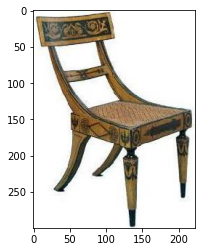

In [41]:
#display a chair image
img=image.load_img('/content/drive/MyDrive/CaltechTiny/test/chair/image_0001.jpg')
plt.imshow(img)

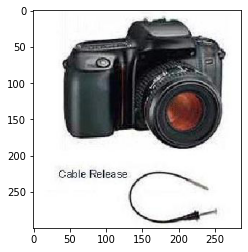

In [42]:
#display a camera image
img=image.load_img('/content/drive/MyDrive/CaltechTiny/test/camera/image_0001.jpg')
plt.imshow(img)

In [43]:
# function to load image from folders
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))    
        if img is not None:
            img = cv2.resize(img , (64 , 64)) #images have different sizes So we resize all image to be same dimesions
            images.append(img)
    return images

In [44]:
#read train Chair images
chair_imgs=load_images_from_folder('/content/drive/MyDrive/CaltechTiny/train/chair')
chair_imgs[3].shape

(64, 64, 3)

In [45]:
#read train Camera images
camera_imgs=load_images_from_folder('/content/drive/MyDrive/CaltechTiny/train/camera')
camera_imgs[0].shape

(64, 64, 3)

In [46]:
#read Test images
test_chair_imgs=load_images_from_folder('/content/drive/MyDrive/CaltechTiny/test/chair')
test_camera_imgs=load_images_from_folder('/content/drive/MyDrive/CaltechTiny/test/camera')

In [47]:
#function to convert the images into vector format
def preprocessing_data(images):
  flatten_images=[]
  
  for image in images:
     image=image.flatten() #using flatten
     flatten_images.append(image)
  return flatten_images
  

In [48]:
chair_imgs=preprocessing_data(chair_imgs)
camera_imgs=preprocessing_data(camera_imgs)


In [49]:
test_chair_imgs=np.array(preprocessing_data(test_chair_imgs))
test_camera_imgs=np.array(preprocessing_data(test_camera_imgs))

In [50]:
#create label list for each class 
lables_chair=[0] * len(chair_imgs) #chair has label 0
lables_camera=[1] * len(camera_imgs) #camera has label 1

In [51]:
#concatenate all train and label
inputs=chair_imgs+camera_imgs
t=lables_chair+lables_camera

In [52]:
#convert inputs from list to array
inputs=np.array(inputs)
inputs.shape

(72, 12288)

In [53]:
inputs

array([[ 73, 112, 165, ..., 206, 181, 155],
       [110, 106, 117, ..., 102, 105, 103],
       [149, 200, 221, ..., 160,  12, 118],
       ...,
       [251, 251, 251, ..., 250, 250, 250],
       [101, 204, 153, ..., 101, 204, 153],
       [ 12,  11,  15, ...,  47,  46,  50]], dtype=uint8)

In [54]:
#create lists of bias=1 for train and test
bias_train = np.ones((inputs.shape[0], 1))
bias_chair= np.ones((test_chair_imgs.shape[0], 1))
bias_camera=np.ones((test_camera_imgs.shape[0], 1))

In [55]:
#concatenate bias for train and test
inputs= np.concatenate((inputs,bias_train), axis = 1)
test_chair_imgs=np.concatenate((test_chair_imgs,bias_chair), axis = 1)
test_camera_imgs=np.concatenate((test_camera_imgs,bias_camera), axis = 1)

In [56]:
inputs

array([[ 73., 112., 165., ..., 181., 155.,   1.],
       [110., 106., 117., ..., 105., 103.,   1.],
       [149., 200., 221., ...,  12., 118.,   1.],
       ...,
       [251., 251., 251., ..., 250., 250.,   1.],
       [101., 204., 153., ..., 204., 153.,   1.],
       [ 12.,  11.,  15., ...,  46.,  50.,   1.]])

In [57]:
test_chair_imgs

array([[205., 217., 227., ..., 182., 197.,   1.],
       [ 50.,  68.,  79., ..., 216., 238.,   1.],
       [204., 204., 204., ..., 204., 204.,   1.],
       ...,
       [143., 128., 125., ..., 111.,  95.,   1.],
       [255., 255., 255., ..., 254., 253.,   1.],
       [252., 250., 255., ..., 255., 255.,   1.]])

In [58]:
#convert label for array
t=np.array(t)
t.shape

(72,)

In [59]:
np.random.seed(44)
#no.of epochs(iterations)
iterNo = 1000
#learning rate
rho = 0.001

In [93]:
#derviative of activation function 
def g_dash(x):
    return  1 / (1 + np.exp(-x))
#activation function (tanh)
def g(x):
  return 1 if (np.tanh(x)) >0 else 0

In [85]:
def train(inputs,t,rho,iterNo):
  #get no.of features and vectors
  n_records, n_inputs= inputs.shape
  #shuffle inputs and labels
  inputs, t = shuffle(inputs, t)
  #initialize weights random numbers with size= no.of inputs n+1
  weights = np.random.normal(scale=1 / n_inputs**.5, size=n_inputs)
  for e in range(iterNo):
        for x, y in zip(inputs, t):
            #feed-forward process and feed-backward process
            #1.predict the output(0 or 1) by passing the dot product of inputs and weights to tanh func g(x)
            pred = g(np.dot(x, weights))
            #2.calculate the error (label-Predicted)
            error =  y-pred
            #3.calculate the derviative of weights
            derv_weights=rho * error *g_dash(pred) *x
            #4.update weights using derivative
            weights += derv_weights
  np.save('weights.npy', weights) # save last weights

In [86]:
train(inputs,t,rho,iterNo)

In [87]:
weights = np.load('weights.npy') # load trained weights

In [88]:
def testPerceptron(sample_test,weights):
  pred = g(np.dot(sample_test, weights))
  return pred

In [89]:
testPerceptron(test_camera_imgs[5],weights)

1

In [90]:
testPerceptron(test_camera_imgs[2],weights)

1

In [91]:
testPerceptron(test_chair_imgs[8],weights)

0

In [92]:
testPerceptron(test_chair_imgs[0],weights)

0